h, 0 -h e -J:

In [255]:
import numpy as np

def Z(J,h,T):
    Z = (1 + 2*(np.cosh(h/T)) + np.exp(J/T))
    return Z

def energia_Livre(J, h, T):
    F = (-1) * T * (np.log(Z(J, h, T)))
    return F

def energia_Media(J, h, T):
    numerador = ((-1) * ((J * np.exp(J/T)) + (2 * h * np.sinh(h/T)))) 
    denominador = Z(J, h, T)
    U = (numerador / denominador)
    return U

def entropia(J, h, T):
    numerador = (((-1) * ((J*np.exp(J/T)) + (2*h*np.sinh(h/T))))/T)
    denominador = Z(J, h, T)
    S = (np.log(Z(J, h, T)) + (numerador / denominador))
    return S 

def magnetizacao(J, h, T):
    numerador = (2 * np.sinh(h/T))
    denominador = Z(J, h, T)
    M = (numerador / denominador)
    return M

def susceptibilidade(J, h, T):
    term1 = ((2 * np.cosh(h/T)) / (T * Z(J, h, T)))
    term2 = ((4 * (np.sinh(h/T))**2) / (T * (Z(J, h, T))**2))
    X = term1 - term2
    return X


+2h, 0, -2h e -8J :

In [3]:
def Z(J,h,T):
    Z = (1 + 2*(np.cosh(2*h/T)) + np.exp((8*J)/T))
    return Z

def energia_Media(J, h, T):
    numerador = ((-1) * (((8*J) * np.exp((8*J)/T)) + ((4 * h) * np.sinh((2*h)/T)))) 
    denominador = Z(J, h, T)
    U = (numerador / denominador)
    return U

def entropia(J, h, T):
    numerador = (((-1) * (((8*J)*np.exp((8*J)/T)) + ((4*h)*np.sinh((2*h)/T))))/T)
    denominador = Z(J, h, T)
    S = (np.log(Z(J, h, T)) + (numerador / denominador))
    return S 

def magnetizacao(J, h, T):
    numerador = (4 * np.sinh(2*h/T))
    denominador = Z(J, h, T)
    M = (numerador / denominador)
    return M

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def Temp_MxB(J, h, T, entropy):
    #Função que vai garantir que a entropia do sistema vai ser constante durante todo o processo    
    function = (entropy - entropia(J, h, T)) 
    return function

def calcula_T_Ciclo_MxB(J, hi, hf, Tc, Th, PASSOS):
    
    Tcold = Tc
    Thot = Th
    
    S_c = round(entropia(J, hi, Tcold), 10)
    S_h = round(entropia(J, hf, Thot), 10)
    
    h_values_i = np.linspace(hi, hf, PASSOS)
    h_values_f = np.linspace(hf, hi, PASSOS)
    
    temperatures = []
    S_values_i = np.zeros_like(h_values_i)
    S_values_f = np.zeros_like(h_values_f)
    T_values_i = np.zeros_like(h_values_i)
    T_values_f = np.zeros_like(h_values_f)
    
    for i, h in enumerate(h_values_i):            
        Tc_add = fsolve(lambda Temperature_cold: Temp_MxB(J, h_values_i[i], Temperature_cold, S_c), Tcold)
        if Tc_add < 0:
            print(f"Tc_add negativa! J={J}, hi={h_values_i[i]}, Tc-iteration={Tcold}")
            Tc_add = abs(Tc_add)
        T_values_i[i] = Tc_add[0]
        S_values_i[i] = np.round(entropia(J, h_values_i[i], T_values_i[i]), 10)
        S_c = S_values_i[i]
        temperatures.append(Tc_add[0])
        Tcold = Tc_add[0]
        
        
        
    for i, h in enumerate(h_values_f):
        Th_add = fsolve(lambda Temperature_hot: Temp_MxB(J, h_values_f[i], Temperature_hot, S_h), Thot)
        if Th_add < 0:
            print(f"Th_add negativa! J={J}, hf={h_values_f[i]}, Tc-iteraction={Thot}")
            Th_add = abs(Tc_add)
        T_values_f[i] = Th_add[0]
        S_values_f[i] = np.round(entropia(J, h_values_f[i], T_values_f[i]), 10)
        S_h = S_values_f[i]
        temperatures.append(Th_add[0])
        Thot = Th_add[0]
        

    
    T_heating_values = np.linspace(Tc_add, Th, PASSOS)
    T_cooling_values = np.linspace(Th_add, Tc, PASSOS)
    
    S_heating_values = np.zeros_like(h_values_i)
    S_cooling_values = np.zeros_like(h_values_i)
    
    S_heating_values = np.round(entropia(J, hf, T_heating_values), 10)
    S_cooling_values = np.round(entropia(J, hi, T_cooling_values), 10)
    
    
    #print("Temperatures Range:")
    #print(f"1 -> 2 (Tc -> Tc_add): Tc: {Tc}, Tc_add: {Tc_add}")
    #print(f"2 -> 3 (T_heating): Tc_add: {Tc_add} Th: {Th}")
    #print(f"3 -> 4 (Th -> Th_add): Th: {Th}, Th_add: {Th_add}")
    #print(f"4 -> 1 (T_cooling): Th_add: {Th_add}, Tc: {Tc}")

    
    
    return Tc_add, Th_add, T_values_i, T_values_f, h_values_i, h_values_f, S_values_i, S_values_f, T_heating_values, T_cooling_values, S_heating_values, S_cooling_values

In [5]:
def Ciclo_de_Otto_MxB(J, hi, hf, Tc, Tc_add, Th, Th_add):
        if abs((8*J) - (2*hi)) < 1e-10:
                print(f"Neste ponto J = hi, quando (hi -> hf), J={J} e hi={hi}")


        if abs((8*J) - (2*hf)) < 1e-10:
                print(f"Neste ponto J = hi, quando (hf -> hi), J={J} e hf={hf}")
        


        #calculando a energia interna para J1, hi e Tc
        E1 = energia_Media(J, hi, Tc)

        #calculando a energia interna para Jf, hf e Tc_add
        E2 = energia_Media(J, hf, abs(Tc_add))

        #calculando a energia interna para Jf, hf e Th
        E3 = energia_Media(J, hf, Th)

        #calculando a energia interna para Ji, hi e Th_add
        E4 = energia_Media(J, hi, abs(Th_add))

        #calculando Os valores de Trabalho e Calor em cada parte do Ciclo de Otto
        Wout = E2 - E1
        Qin = E3 - E2
        Win = E4 - E3
        Qout = E1 - E4

        #Calculando a eficiência do ciclo 
        #print(f'eff = -(Wout + Win)/abs(Qin)')
        #eff = -(Wout + Win)/abs(Qout)
        eff = 1 - (abs(Qout)/abs(Qin))

        return [Win, Wout, Qin, Qout, eff] 

In [6]:
def functions_MxB(J, hi, h_values_i, hf, h_values_f, Tc, T_values_i, Th, T_values_f, T_heating_values, T_cooling_values):
    
    #Calcula as temperaturas do Ciclo de Otto
    #T_values_i, T_values_f, h_values_i, h_values_f, S_values_i, S_values_f, T_heating_values, T_cooling_values = calcula_T_Ciclo_MxB(J, hi, hf, Tc, Th, PASSOS)
    
    
    
    #Expansão Adiabática
    M_exp_add = magnetizacao(J, h_values_i, T_values_i)
    
    #Aquecimento Isocórico
    M_aquec_iso = magnetizacao(J, hf, T_heating_values)
    
    #Compressão Adiabática
    M_comp_add = magnetizacao(J, h_values_f, T_values_f)
    
    #Resfriamento Isocórico
    M_resfri_iso = magnetizacao(J, hi, T_cooling_values)    
    
    
    
    
    return M_exp_add, M_aquec_iso, M_comp_add, M_resfri_iso

In [7]:
def engineOrWhat(Win, Wout, Qhot, Qcold, Tc, Th, eff):

#Importante lembrar que para o caso "normal"
#Win, Wout, Qin = Qhot, Qout = Qcold, Tc, Th, eff

    titulo = 'inconclusivo'
    #Definindo o Trabalho do Ciclo
    W = Win + Wout   
    
    Tcold = Tc
    Thot  = Th
    
    print(f'W = {W}')
    #Definindo as regiões
    #0: Máquina, [1,2): Refrigerador, [2, 3): Acelerador, [3,4): Aquecedor
    if W < 0:
        titulo = 'Máquina'
        print("Máquina!")
    elif (W > 0 and Qcold < 0 and Qhot > 0 and Tc > Th):
        print("Acelerador")
        titulo = 'Acelerador'
    elif (W > 0 and Qcold > 0 and Qhot < 0 and Tc < Th):
        titulo = 'Acelerador'
        print("Acelerador!")
    elif (W > 0 and Qcold < 0 and Qhot > 0 and Tc < Th):
        titulo = 'Refrigerador'
        print("Refrigerador!")
    elif (W > 0 and Qcold > 0 and Qhot < 0 and Tc > Th):
        titulo = 'Refrigerador'
        print("Refrigerador!")
    elif (W > 0 and Qhot < 0 and Qcold < 0):
        titulo = 'Aquecedor'
        print("Aquecedor!")


    eta = abs(W)/abs(Qhot)

    print(f'W = Win + Wout')
    print(f"ETA = abs(W) / abs(Qin) ETA=Eff???: {eta}")
    print(f"Win: {Win}, Wout: {Wout}, Qin: {Qhot}, Qout: {Qcold}, eff: {eff}")
    
    return titulo

In [81]:
def plot_ciclo_MxB(hi, hf, h_values_i, h_values_f, M_exp_add, M_aquec_iso, M_comp_add, M_resfri_iso, titulo):
    
    
    
    h_heating = np.linspace(hf, hf, len(M_aquec_iso))
    h_cooling = np.linspace(hi, hi, len(M_resfri_iso))
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(h_values_i, M_exp_add, label='Expansão Adiabática', color='blue', marker='>')
    plt.plot(h_heating, M_aquec_iso, label='Aquecimento Isocórico', color='orange', marker='o')
    plt.plot(h_values_f, M_comp_add, label='Compressão Adiabática', color='green', marker='<')
    plt.plot(h_cooling, M_resfri_iso, label='Resfriamento Isocórico', color='red', marker='x')    
    
    
    plt.xlabel('Campo Magnético (h)')
    plt.ylabel('Magnetização (M)')
    plt.title(f'Ciclo de Otto Mxh -- {titulo}!')
    plt.legend()
    plt.grid()
    plt.show()
    
def plot_ciclo_SxB(J, hi, hf, h_values_i, h_values_f, S_values_i , S_values_f, S_heating_values, S_cooling_values, titulo):
    
    h_heating = np.linspace(hf, hf, len(h_values_i))
    h_cooling = np.linspace(hi, hi, len(h_values_i))
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(h_values_i, S_values_i, label='Expansão Adiabática', color='blue', marker='>')
    plt.plot(h_heating, S_heating_values, label='Aquecimento Isocórico', color='orange', marker='x')
    plt.plot(h_values_f, S_values_f, label='Compressão Adiabática', color='green', marker='<')
    plt.plot(h_cooling, S_cooling_values, label='Resfriamento Isocórico', color='red', marker='o')
    
    plt.xlabel('Campo Magnético (h)')
    plt.ylabel('Entropia (S)')
    plt.title(f'Ciclo de Otto Sxh -- {titulo} | J={J}, h_i={hi}, hf={hf}')
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
    
    #calcula_T_Ciclo_MxB(J, hi, hf, Tc, Th, PASSOS):
    #return Tc_add, Th_add, T_values_i, T_values_f, h_values_i, h_values_f, S_values_i, S_values_f, T_heating_values, T_cooling_values, S_heating_values, S_cooling_values
    
    #functions_MxB(J, hi, hf, Tc, Th, PASSOS):
    #return M_exp_add, M_aquec_iso, M_comp_add, M_resfri_iso
    
    #def Ciclo_de_Otto_MxB(J, hi, hf, Tc, Tc_add, Th, Th_add):
    #return [Win, Wout, Qin, Qout, eff] 
    
    #engineOrWhat(Win, Wout, Qhot, Qcold, Tc, Th, eff):
    
    #plot_ciclo_MxB(T_values_i, T_values_f, h_values_i, h_values_f, S_values_i, S_values_f, T_heating_values, T_cooling_values):
    
    #plot_ciclo_MxB(hi, hf, h_values_i, h_values_f, M_exp_add, M_aquec_iso, M_comp_add, M_resfri_iso):

----------------------------

Aqui vamos estudar como os trabalhos e calores mudam de acordo com o valor de J

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def plot_energies_x_J(J_range, hi, hf, Tc, Th, PASSOS):
    
    J = np.linspace(0.001, J_range, 50)
    
    
    Win = np.zeros_like(J)
    Wout = np.zeros_like(J)
    Qin = np.zeros_like(J)
    Qout = np.zeros_like(J)
    eff = np.zeros_like(J)
    
    for i, Jj in enumerate(J):
        
        Tc_add, Th_add, T_values_i, T_values_f, h_values_i, h_values_f, S_values_i, S_values_f, T_heating_values, T_cooling_values, S_heating_values, S_cooling_values= calcula_T_Ciclo_MxB(Jj, hi, hf, Tc, Th, PASSOS)
        Win[i], Wout[i], Qin[i], Qout[i], eff[i] = Ciclo_de_Otto_MxB(Jj, hi, hf, Tc, Tc_add, Th, Th_add)

    
    plt.figure(figsize=(10,6))
    plt.plot(J, Win, label='Win', color='blue', lw=2.5, linestyle='--')
    plt.plot(J, Wout, label='Wout', color='green', lw=2.5, linestyle='--' )
    plt.plot(J, Qin, label='Qin', color='red', lw=2.5)
    plt.plot(J, Qout, label='Qout', color='purple', lw=2.5)
    plt.plot(J, eff, label='$Eff$', color='black')
    #plt.xticks(np.arange(0.3, 0.8, 0.02))
    plt.title(f'Calor e Trabalho como função de J - hi={1}, hf={2}, Tc={Tc}, Th={Th}.')
    plt.xlabel('J')
    plt.legend()
    plt.grid(True)
    
    plt.show()
    
    
    

/tmp/ipykernel_6133/617875684.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Win[i], Wout[i], Qin[i], Qout[i], eff[i] = Ciclo_de_Otto_MxB(Jj, hi, hf, Tc, Tc_add, Th, Th_add)


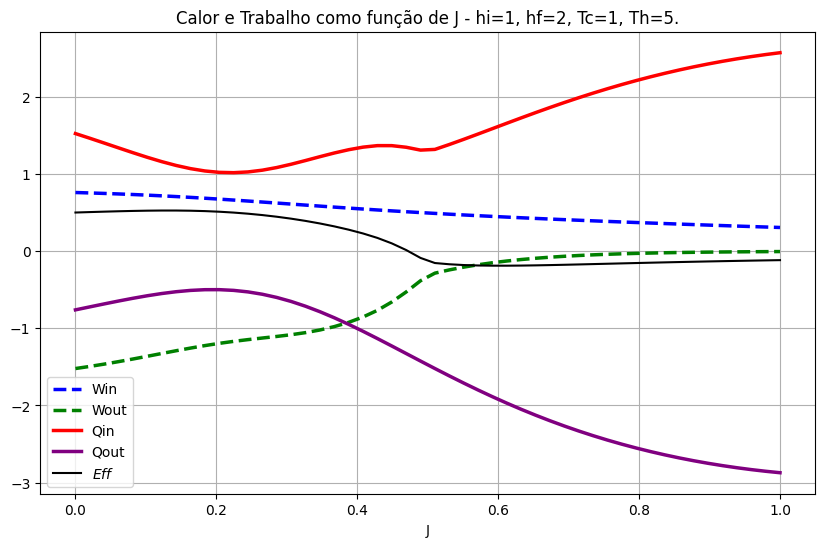

In [79]:
J_range = 1
hi = 1
hf = 2
Tc = 1
Th = 5
PASSOS = 5
plot_energies_x_J(J_range, hi, hf, Tc, Th, PASSOS)

/tmp/ipykernel_6133/617875684.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Win[i], Wout[i], Qin[i], Qout[i], eff[i] = Ciclo_de_Otto_MxB(Jj, hi, hf, Tc, Tc_add, Th, Th_add)
/tmp/ipykernel_6133/3803078045.py:28: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  Tc_add = fsolve(lambda Temperature_cold: Temp_MxB(J, h_values_i[i], Temperature_cold, S_c), Tcold)


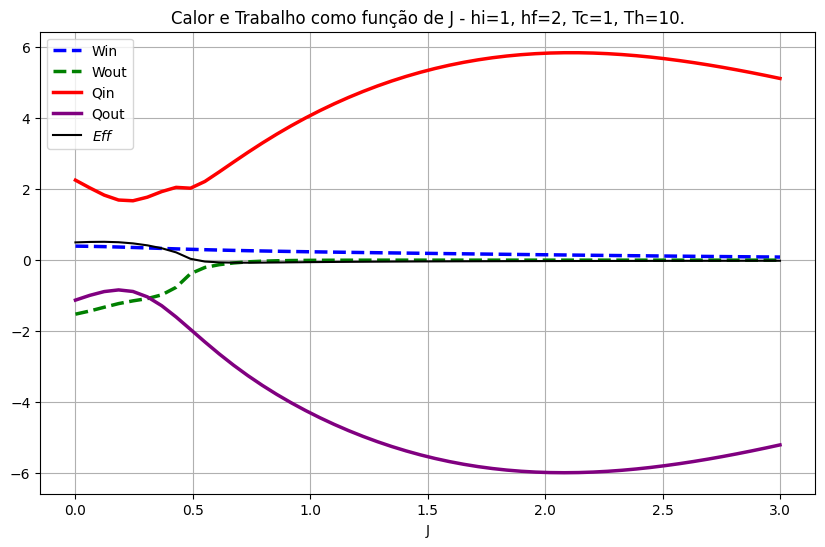

In [34]:
J_range = 3
hi = 1
hf = 2
Tc = 1
Th = 10
PASSOS = 10

plot_energies_x_J(J_range, hi, hf, Tc, Th, PASSOS)

---------------------------

In [41]:
import numpy as np
import matplotlib.pyplot as plt  # Corrigido: matplotlib.pyplot

def plot_eff(J_range, hi, hf, Tc, Th_list, PASSOS):
    J = np.linspace(0.001, J_range, 50)
    colors = ['blue', 'red', 'green', 'orange', 'black']

    plt.figure(figsize=(10, 6)) 

    for i, Thot in enumerate(Th_list): 
        eff = np.zeros_like(J)

        for j, Jj in enumerate(J):           
            Tc_add, Th_add, T_values_i, T_values_f, h_values_i, h_values_f, \
            S_values_i, S_values_f, T_heating_values, T_cooling_values, \
            S_heating_values, S_cooling_values = calcula_T_Ciclo_MxB(Jj, hi, hf, Tc, Thot, PASSOS)

            Win, Wout, Qin, Qout, eta = Ciclo_de_Otto_MxB(Jj, hi, hf, Tc, Tc_add, Thot, Th_add)
            
            W = Win + Wout
            if W < 0:   
                eff[j] = np.round(eta, 7)  

        plt.plot(J, eff, label=f'Th = {Thot}', color=colors[i % len(colors)])

    plt.title(f"Efficiência x J para diferentes valores de Th - hi={hi}, hf={hf}, Tc={Tc}")
    plt.xlabel("J")
    plt.ylabel("Eficiência")
    #plt.xticks(np.arange(0.2, 0.6, 0.05))
    plt.legend()
    plt.grid(True)
    plt.axvspan(0.25, 0.5, color='gray', alpha=0.3)
    plt.show()

Tc_add negativa! J=0.30681632653061225, hi=1.2222222222222223, Tc-iteration=0.31084272332533763
Tc_add negativa! J=0.36797959183673473, hi=1.4444444444444444, Tc-iteration=0.1529592261761019
Tc_add negativa! J=0.3883673469387755, hi=1.5555555555555556, Tc-iteration=0.10148110515113892
Tc_add negativa! J=0.42914285714285716, hi=1.6666666666666665, Tc-iteration=0.11445703198842996
Tc_add negativa! J=0.449530612244898, hi=1.7777777777777777, Tc-iteration=0.08362991003080256
Tc_add negativa! J=0.4699183673469388, hi=1.8888888888888888, Tc-iteration=0.05867751133852861
Tc_add negativa! J=0.5106938775510205, hi=2.0, Tc-iteration=0.07452041192950089
Tc_add negativa! J=0.30681632653061225, hi=1.2222222222222223, Tc-iteration=0.31084272332533763
Tc_add negativa! J=0.36797959183673473, hi=1.4444444444444444, Tc-iteration=0.1529592261761019
Tc_add negativa! J=0.3883673469387755, hi=1.5555555555555556, Tc-iteration=0.10148110515113892
Tc_add negativa! J=0.42914285714285716, hi=1.6666666666666665, 

/tmp/ipykernel_6133/2506278808.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  eff[j] = np.round(eta, 7)
/tmp/ipykernel_6133/1060547690.py:12: RuntimeWarning: overflow encountered in sinh
  numerador = (((-1) * (((8*J)*np.exp((8*J)/T)) + ((4*h)*np.sinh((2*h)/T))))/T)
/tmp/ipykernel_6133/1060547690.py:2: RuntimeWarning: overflow encountered in cosh
  Z = (1 + 2*(np.cosh(2*h/T)) + np.exp((8*J)/T))
/tmp/ipykernel_6133/1060547690.py:14: RuntimeWarning: invalid value encountered in divide
  S = (np.log(Z(J, h, T)) + (numerador / denominador))
/tmp/ipykernel_6133/51767867.py:28: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  Tc_add = fsolve(lambda Temperature_cold: Temp_MxB(J, h_values_i[i], Temperature_cold, S_c), Tcold)


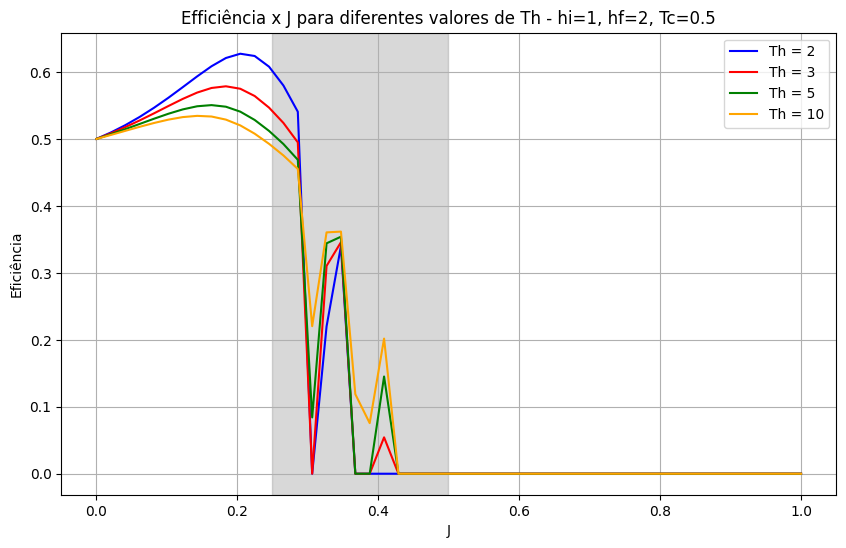

In [42]:
J = 1
hi = 1
hf = 2
Tc = 0.5
Th = [2, 3, 5, 10]
Passos = 10
plot_eff(J,hi,hf,Tc,Th,Passos)

Tc_add negativa! J=0.30681632653061225, hi=1.2222222222222223, Tc-iteration=0.31084272332533763
Tc_add negativa! J=0.36797959183673473, hi=1.4444444444444444, Tc-iteration=0.1529592261761019
Tc_add negativa! J=0.3883673469387755, hi=1.5555555555555556, Tc-iteration=0.10148110515113892
Tc_add negativa! J=0.42914285714285716, hi=1.6666666666666665, Tc-iteration=0.11445703198842996
Tc_add negativa! J=0.449530612244898, hi=1.7777777777777777, Tc-iteration=0.08362991003080256
Tc_add negativa! J=0.4699183673469388, hi=1.8888888888888888, Tc-iteration=0.05867751133852861
Tc_add negativa! J=0.5106938775510205, hi=2.0, Tc-iteration=0.07452041192950089
Tc_add negativa! J=0.30681632653061225, hi=1.2222222222222223, Tc-iteration=0.31084272332533763
Tc_add negativa! J=0.36797959183673473, hi=1.4444444444444444, Tc-iteration=0.1529592261761019
Tc_add negativa! J=0.3883673469387755, hi=1.5555555555555556, Tc-iteration=0.10148110515113892
Tc_add negativa! J=0.42914285714285716, hi=1.6666666666666665, 

/tmp/ipykernel_6133/2506278808.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  eff[j] = np.round(eta, 7)
/tmp/ipykernel_6133/1060547690.py:12: RuntimeWarning: overflow encountered in sinh
  numerador = (((-1) * (((8*J)*np.exp((8*J)/T)) + ((4*h)*np.sinh((2*h)/T))))/T)
/tmp/ipykernel_6133/1060547690.py:2: RuntimeWarning: overflow encountered in cosh
  Z = (1 + 2*(np.cosh(2*h/T)) + np.exp((8*J)/T))
/tmp/ipykernel_6133/1060547690.py:14: RuntimeWarning: invalid value encountered in divide
  S = (np.log(Z(J, h, T)) + (numerador / denominador))
/tmp/ipykernel_6133/51767867.py:28: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  Tc_add = fsolve(lambda Temperature_cold: Temp_MxB(J, h_values_i[i], Temperature_cold, S_c), Tcold)


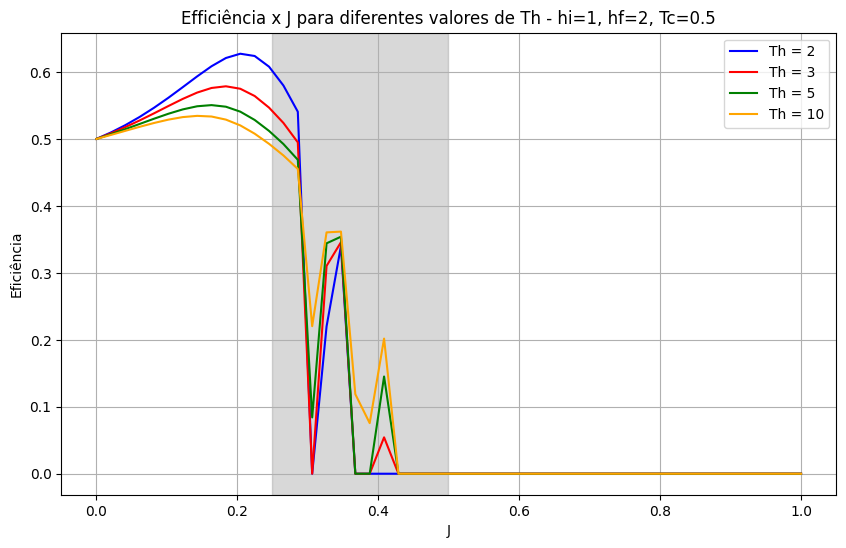

In [43]:
J = 1
hi = 1
hf = 2
Tc = 0.5
Th = [2, 3, 5, 10]
Passos = 10
plot_eff(J,hi,hf,Tc,Th,Passos)


------------------------

In [45]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def plot_eff_Th(J, hi, hf, Tc, Th_range, PASSOS):
    Th = np.linspace(0.03, Th_range, 100)
    colors = ['blue', 'red', 'green', 'orange', 'black', 'orange'] 
    plt.figure(figsize=(10, 6))   
    
    for c, Tcold in enumerate(Tc):
        eff = np.zeros_like(Th)
        W = np.zeros_like(Th)
        Tth = np.zeros_like(Th)
        
        for h, Thot in enumerate(Th):
            
                Tc_add, Th_add, T_values_i, T_values_f, h_values_i, h_values_f, \
                S_values_i, S_values_f, T_heating_values, T_cooling_values, \
                S_heating_values, S_cooling_values = calcula_T_Ciclo_MxB(J, hi, hf, Tcold, Thot, PASSOS)

                Win, Wout, Qin, Qout, eta = Ciclo_de_Otto_MxB(J, hi, hf, Tcold, Tc_add, Thot, Th_add)
                Ww = Win + Wout
                
                if Ww < 0:
                    eff[h] = eta
                    W[h] = Ww
                    Tth[h] = Thot
                else:
                    eff[h] = eta
                    Tth[h] = None
        
        #ax_main.plot(1/Th, eff, label=f'Tc={Tcold}')
        #ax_inset.plot(1/Th, W)        
        plt.plot(1/Tth, eff, label=f'Tc = {Tcold}', color=colors[c % len(colors)])
    
    
    
    #ax_main.set_title(f"Efficiência x Th para diferentes valores de Tc - J={J}, hi={hi}, hf={hf}")
    #ax_main.set_xlabel(r'$\beta_h$')
    #ax_main.set_ylabel(r'$\eta$')
    #ax_main.axhline(0.5, linestyle='--', color='black', label=r'$\eta_0$')
    #ax_main.legend(loc='lower right')
    
    #ax_inset.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    #ax_inset.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8])
    #ax_inset.set_xlabel(r'$\beta_a$', fontsize=8)
    #ax_inset.set_ylabel('W', fontsize=8)
    #ax_inset.tick_params(labelsize=8)
    #ax_main.grid(True)

    plt.title((f"Efficiência x $\\beta_h$ para diferentes valores de Tc - J={J}, hi={hi}, hf={hf}"))
    plt.xlabel(r'$\beta_h$')
    plt.ylabel("Eficiência")
    plt.legend()
    plt.grid(True)
    plt.show()
    

/tmp/ipykernel_6133/51767867.py:41: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  Th_add = fsolve(lambda Temperature_hot: Temp_MxB(J, h_values_f[i], Temperature_hot, S_h), Thot)
/tmp/ipykernel_6133/87492387.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  eff[h] = eta
/tmp/ipykernel_6133/87492387.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  eff[h] = eta
/tmp/ipykernel_6133/87492387.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array be

Th_add negativa! J=0.24, hf=1.0, Tc-iteraction=0.06321988013419391
Th_add negativa! J=0.24, hf=1.0, Tc-iteraction=0.0787151264803614
Th_add negativa! J=0.24, hf=1.0, Tc-iteraction=0.095256647074959
Th_add negativa! J=0.24, hf=1.0, Tc-iteraction=0.11343550195433956
Th_add negativa! J=0.24, hf=1.0, Tc-iteraction=0.13406536941579777
Th_add negativa! J=0.24, hf=1.0, Tc-iteraction=0.15838972915817065
Th_add negativa! J=0.24, hf=1.0, Tc-iteraction=0.1885050980850169
Th_add negativa! J=0.24, hf=1.0, Tc-iteraction=0.06321988013419391
Th_add negativa! J=0.24, hf=1.0, Tc-iteraction=0.0787151264803614
Th_add negativa! J=0.24, hf=1.0, Tc-iteraction=0.095256647074959
Th_add negativa! J=0.24, hf=1.0, Tc-iteraction=0.11343550195433956
Th_add negativa! J=0.24, hf=1.0, Tc-iteraction=0.13406536941579777
Th_add negativa! J=0.24, hf=1.0, Tc-iteraction=0.15838972915817065
Th_add negativa! J=0.24, hf=1.0, Tc-iteraction=0.1885050980850169
Th_add negativa! J=0.24, hf=1.0, Tc-iteraction=0.06321988013419391
Th_

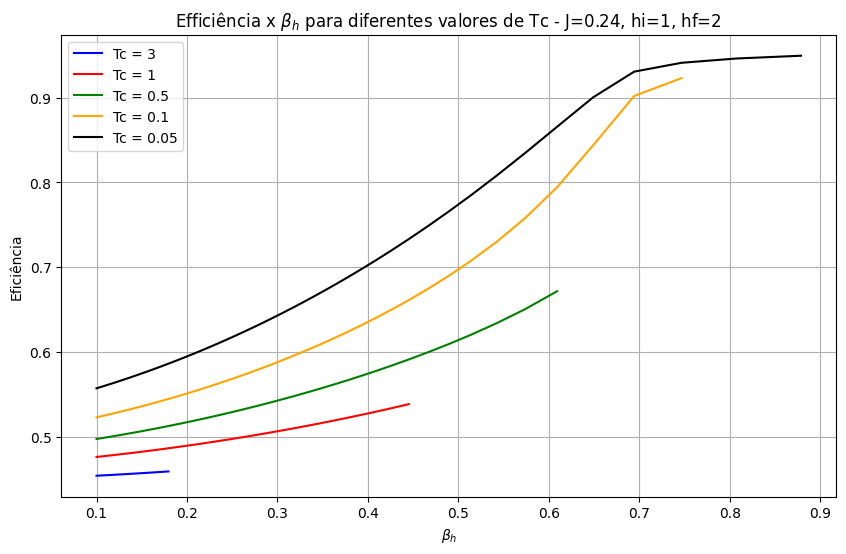

In [77]:
J = 0.24
hi = 1
hf = 2
Tc = [3,1,0.5, 0.1, 0.05]
Th = 10
Passos = 10
plot_eff_Th(J, hi, hf, Tc, Th, PASSOS)

-------------------------------

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
etta = Ww/Qout)   
    
    
    for c, Thot in enumerate(Th):
        eff = np.zeros_like(Tc)
        W = np.zeros_like(Tc) 
        for h, Tcold in enumerate(Tc):
            
                Tc_add, Th_add, T_values_i, T_values_f, h_values_i, h_values_f, \
                S_values_i, S_values_f, T_heating_values, T_cooling_values, \
                S_heating_values, S_cooling_values = calcula_T_Ciclo_MxB(J, hi, hf, Tcold, Thot, PASSOS)

                Win, Wout, Qin, Qout, eta = Ciclo_de_Otto_MxB(J, hi, hf, Tcold, Tc_add, Thot, Th_add)
                
                Ww = (Win + Wout)
                etta = Ww/Qout
                if Ww < 0:
                    eff[h] = etta
                    W[h] = Ww
        
        #ax_main.plot(1/Th, eff, label=f'Tc={Tcold}')
        #ax_inset.plot(1/Th, W)        
        plt.plot(1/Tc, eff, label=f'Th = {Thot}', color=colors[c % len(colors)])
    
    
    
    #ax_main.set_title(f"Efficiência x Th para diferentes valores de Tc - J={J}, hi={hi}, hf={hf}")
    #ax_main.set_xlabel(r'$\beta_h$')
    #ax_main.set_ylabel(r'$\eta$')
    #ax_main.axhline(0.5, linestyle='--', color='black', label=r'$\eta_0$')
    #ax_main.legend(loc='lower right')
    
    #ax_inset.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    #ax_inset.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8])
    #ax_inset.set_xlabel(r'$\beta_a$', fontsize=8)
    #ax_inset.set_ylabel('W', fontsize=8)
    #ax_inset.tick_params(labelsize=8)
    #ax_main.grid(True)
    plt.title(f"Efficiência x $\\beta_c$ para diferentes valores de Th - J={J}, hi={hi}, hf={hf}")
    plt.xlabel(r'$\beta_c$')
    plt.ylabel("Eficiência")
    plt.legend()
    plt.grid(True)
    plt.show()
    

/tmp/ipykernel_6133/1060547690.py:12: RuntimeWarning: overflow encountered in exp
  numerador = (((-1) * (((8*J)*np.exp((8*J)/T)) + ((4*h)*np.sinh((2*h)/T))))/T)
/tmp/ipykernel_6133/1060547690.py:2: RuntimeWarning: overflow encountered in exp
  Z = (1 + 2*(np.cosh(2*h/T)) + np.exp((8*J)/T))
/tmp/ipykernel_6133/1060547690.py:14: RuntimeWarning: invalid value encountered in scalar divide
  S = (np.log(Z(J, h, T)) + (numerador / denominador))
/tmp/ipykernel_6133/1060547690.py:14: RuntimeWarning: invalid value encountered in divide
  S = (np.log(Z(J, h, T)) + (numerador / denominador))
/tmp/ipykernel_6133/51767867.py:28: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  Tc_add = fsolve(lambda Temperature_cold: Temp_MxB(J, h_values_i[i], Temperature_cold, S_c), Tcold)
/tmp/ipykernel_6133/1060547690.py:6: RuntimeWarning: overflow encountered in exp
  numerador = ((-1) * (((8*J) * np.exp((8*J)/T)) + ((4 * h) * np.sinh((

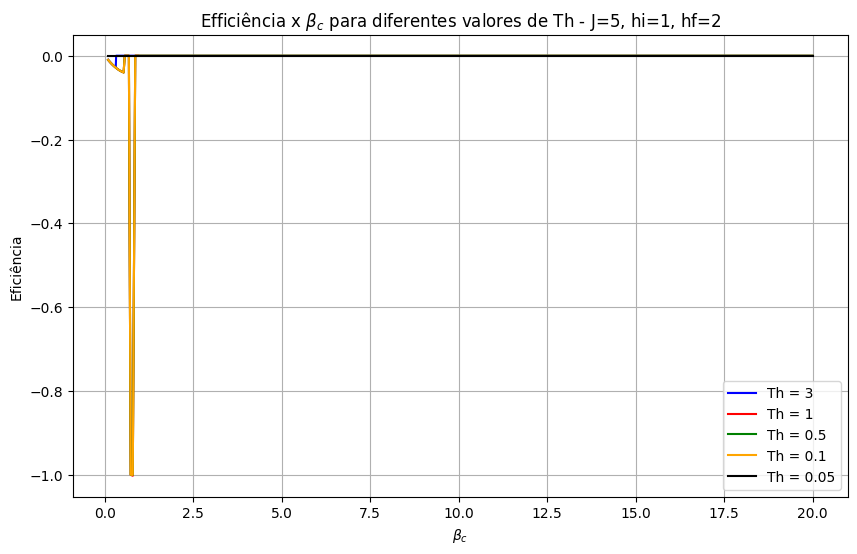

In [66]:
J = 5
hi = 1
hf = 2
Tc = 10
Th = [3,1,0.5, 0.1, 0.05]
Passos = 10
plot_eff_Tc(J, hi, hf, Tc, Th, PASSOS)

--------------------------------------

In [68]:
def main_MxB(J, hi, hf, Tc, Th, PASSOS):
    
    Tc_add, Th_add, T_values_i, T_values_f, h_values_i, h_values_f, S_values_i, S_values_f, T_heating_values, T_cooling_values, S_heating_values, S_cooling_values= calcula_T_Ciclo_MxB(J, hi, hf, Tc, Th, PASSOS)
    
    M_exp_add, M_aquec_iso, M_comp_add, M_resfri_iso = functions_MxB(J, hi, h_values_i, hf, h_values_f, Tc, T_values_i, Th, T_values_f, T_heating_values, T_cooling_values)
    
    Win, Wout, Qin, Qout, eff = Ciclo_de_Otto_MxB(J, hi, hf, Tc, Tc_add, Th, Th_add)
    titulo = engineOrWhat(Win, Wout, Qin, Qout, Tc, Th, eff)
    
    #plot_ciclo_MxB(hi, hf, h_values_i, h_values_f, M_exp_add, M_aquec_iso, M_comp_add, M_resfri_iso, titulo)
    
    plot_ciclo_SxB(J, hi, hf, h_values_i, h_values_f, S_values_i , S_values_f, S_heating_values, S_cooling_values, titulo)

W = [-0.18067678]
Máquina!
W = Win + Wout
ETA = abs(W) / abs(Qin) ETA=Eff???: [0.62787866]
Win: [1.27622133], Wout: [-1.45689811], Qin: [0.28775748], Qout: [-0.1070807], eff: [0.62787866]


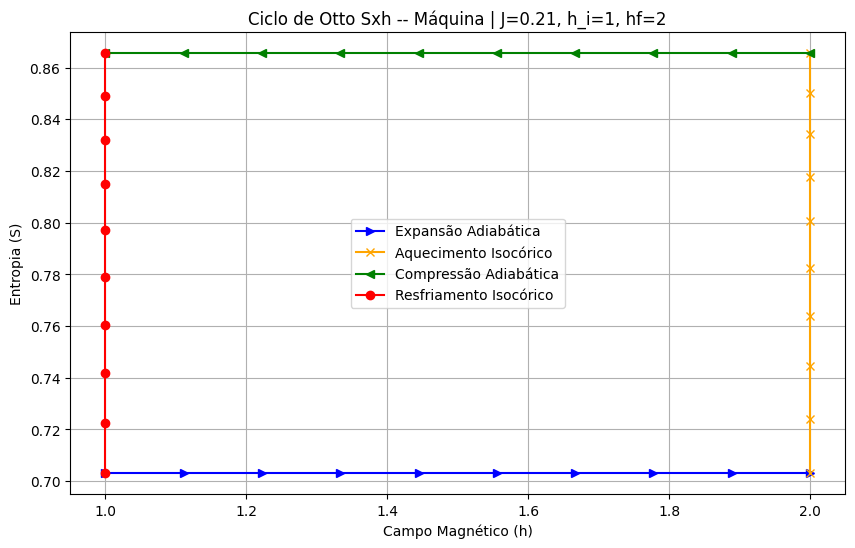

In [82]:
J = 0.21; hi = 1; hf = 2; Tc= 0.5; Th=2; PASSOS = 10
main_MxB(J, hi, hf, Tc, Th, PASSOS)

W = [-0.04057435]
Máquina!
W = Win + Wout
ETA = abs(W) / abs(Qin) ETA=Eff???: [0.1043924]
Win: [0.48971295], Wout: [-0.53028729], Qin: [-0.38867147], Qout: [0.42924582], eff: [-0.1043924]


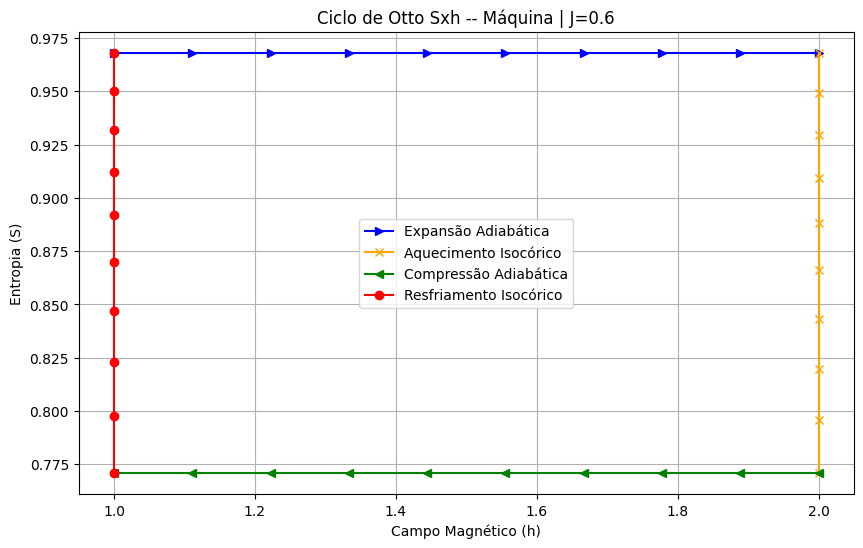

In [72]:
J = 0.6; hi = 1; hf = 2; Tc= 2.5; Th=1.5; PASSOS = 10
main_MxB(J, hi, hf, Tc, Th, PASSOS)

Temperatures Range:
1 -> 2 (Tc -> Tc_add): Tc: 2.5, Tc_add: [5.]
2 -> 3 (T_heating): Tc_add: [5.] Th: 4
3 -> 4 (Th -> Th_add): Th: 4, Th_add: [2.]
4 -> 1 (T_cooling): Th_add: [2.], Tc: 2.5
eff = -(Wout + Win)/abs(Qin)
W = [0.04754334]
Acelerador!
W = Win + Wout
ETA = abs(W) / abs(Qin) ETA=Eff???: [0.5]
Win: [0.24491866], Wout: [-0.19737532], Qin: [-0.09508668], Qout: [0.04754334], eff: [-0.5]


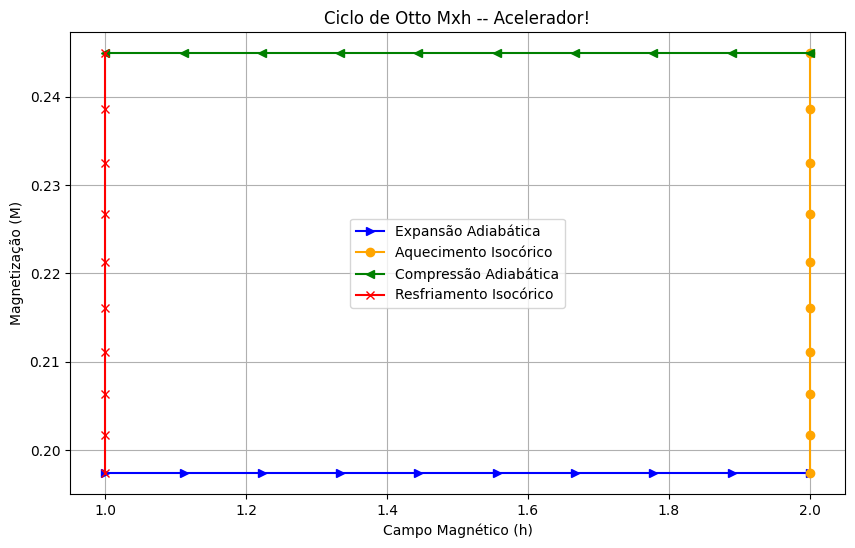

In [151]:
J = 0; hi = 1; hf = 2; Tc= 2.5; Th=4; PASSOS = 10
main_MxB(J, hi, hf, Tc, Th, PASSOS)

Temperatures Range:
1 -> 2 (Tc -> Tc_add): Tc: 2.5, Tc_add: [5.]
2 -> 3 (T_heating): Tc_add: [5.] Th: 1.5
3 -> 4 (Th -> Th_add): Th: 1.5, Th_add: [0.75]
4 -> 1 (T_cooling): Th_add: [0.75], Tc: 2.5
eff = -(Wout + Win)/abs(Qin)
W = [0.38540763]
Refrigerador!
W = Win + Wout
ETA = abs(W) / abs(Qin) ETA=Eff???: [0.5]
Win: [0.58278295], Wout: [-0.19737532], Qin: [-0.77081525], Qout: [0.38540763], eff: [-0.5]


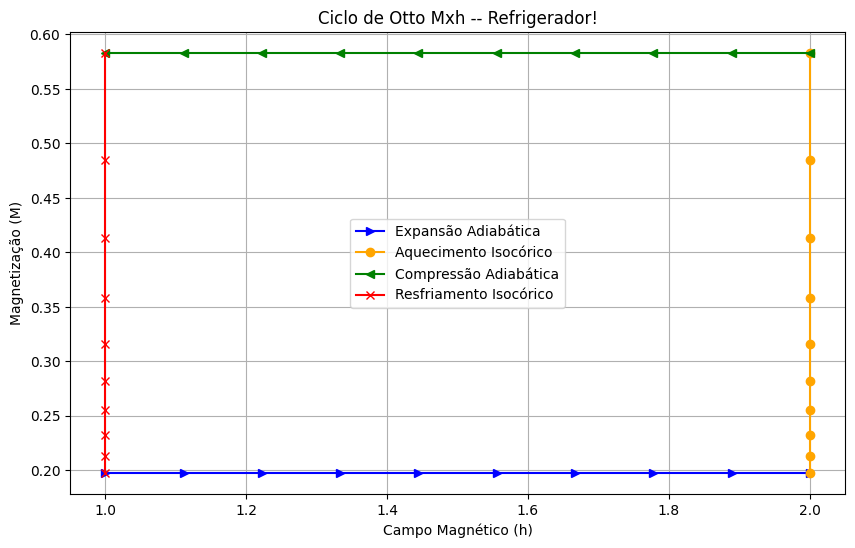

In [178]:
J = 0; hi = 1; hf = 2; Tc= 2.5; Th=1.5; PASSOS = 10
main_MxB(J, hi, hf, Tc, Th, PASSOS)

Temperatures Range:
1 -> 2 (Tc -> Tc_add): Tc: 2.5, Tc_add: [3.39581834]
2 -> 3 (T_heating): Tc_add: [3.39581834] Th: 7.5
3 -> 4 (Th -> Th_add): Th: 7.5, Th_add: [5.25154056]
4 -> 1 (T_cooling): Th_add: [5.25154056], Tc: 2.5
eff = -(Wout + Win)/abs(Qin)
W = [-0.09593825]
Máquina!
W = Win + Wout
ETA = abs(W) / abs(Qin) ETA=Eff???: [0.28303587]
Win: [0.1075319], Wout: [-0.20347015], Qin: [0.33896145], Qout: [-0.2430232], eff: [0.28303587]


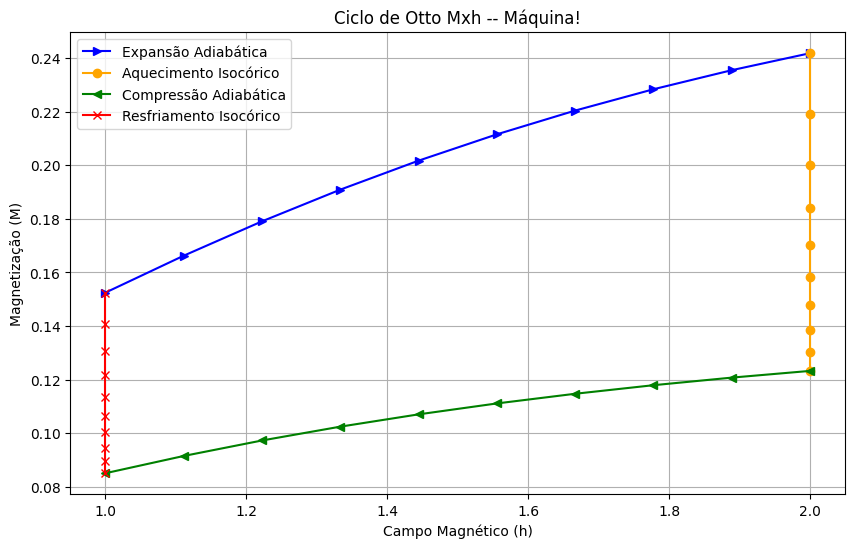

In [179]:
J = 2; hi = 1; hf = 2; Tc= 2.5; Th=7.5; PASSOS = 10
main_MxB(J, hi, hf, Tc, Th, PASSOS)

Temperatures Range:
1 -> 2 (Tc -> Tc_add): Tc: 2.5, Tc_add: [2.41928554]
2 -> 3 (T_heating): Tc_add: [2.41928554] Th: 1
3 -> 4 (Th -> Th_add): Th: 1, Th_add: [1.64620867]
4 -> 1 (T_cooling): Th_add: [1.64620867], Tc: 2.5
eff = -(Wout + Win)/abs(Qin)
W = [-0.12437325]
Máquina!
W = Win + Wout
ETA = abs(W) / abs(Qin) ETA=Eff???: [0.22960409]
Win: [0.38069017], Wout: [-0.50506342], Qin: [-0.54168567], Qout: [0.66605892], eff: [0.22960409]


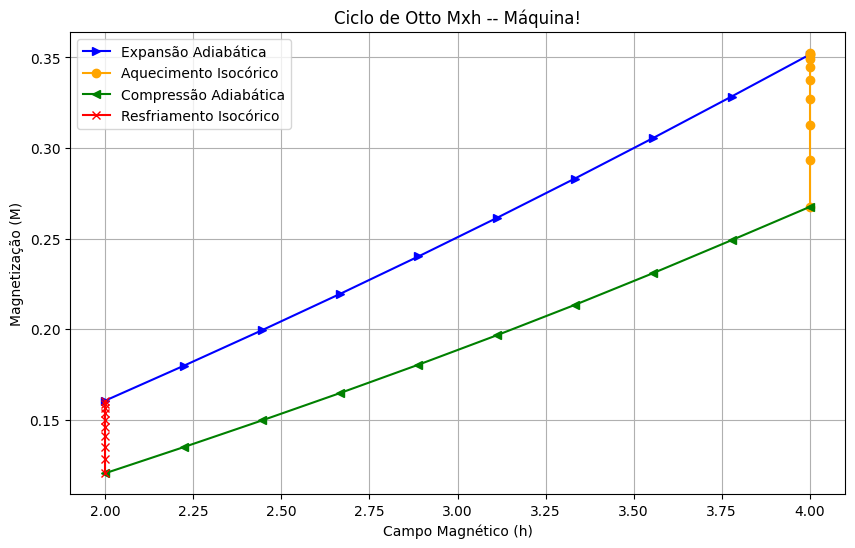

In [180]:
J = 5; hi = 2; hf = 4; Tc= 2.5; Th=1; PASSOS = 10
main_MxB(J, hi, hf, Tc, Th, PASSOS)